In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
import random

In [2]:
im1 = np.array(Image.open('band1.gif', 'r'))
im2 = np.array(Image.open('band2.gif', 'r'))
im3 = np.array(Image.open('band3.gif', 'r'))
im4 = np.array(Image.open('band4.gif', 'r'))

In [3]:
k=3

In [4]:
# 2. Input satellite images, imageInput (512, 512,4)

imageinput=np.array([im1,im2,im3,im4])
print(imageinput.reshape(512,512,4).shape)
print(imageinput[0][0].shape)


(512, 512, 4)
(512,)


In [5]:
# 3. Initialize clusteredImage as the output image

#clusteredImage 

In [6]:
# 4. Select k random x,y co-ordinates and extract pixel values from imageInput 

coord = np.array(([265,190],[32,436],[52,252]))

c1=[]
c2=[]
c3=[]
c4=[]
for i in range(3):
    c1.append(im1[coord[i][0],coord[i][1]])
    c2.append(im2[coord[i][0],coord[i][1]])
    c3.append(im3[coord[i][0],coord[i][1]])
    c4.append(im4[coord[i][0],coord[i][1]])

    
initCentroids=np.array([c1,c2,c3,c4]).T
print(initCentroids.shape)


(3, 4)


In [7]:
#initCentroids (3, 4)
#(512, 512, 4)

def euclidean_dist(x1,x2):
    dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5
    return dist


import sys
min_dist = sys.maxsize
 
cluster = np.zeros((512*512,1))

for i in range(512):
    for j in range(512):
        for x in range(k):
            distance = euclidean_dist(imageinput[:,i,j],initCentroids[x])

            
            if(min_dist > distance):
                min_dist = distance
                label = x
                
       
        cluster[i] = label
        min_dist = sys.maxsize 
        


<ipython-input-7-cfbb8f1453a7>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5


(262144, 1)
(512, 512)


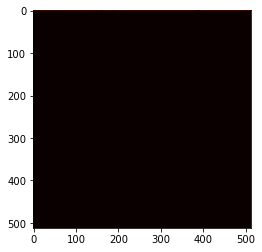

In [17]:
print(cluster.shape)
cl=cluster.reshape(512,512)

#cl = np.reshape(cl,(1, cl.size))
print(cl.shape)
plt.imshow(cl, cmap='hot')
plt.show()

In [ ]:
centroids_new = updateCentroids(classData)

In [25]:
#classData=np.zeros((k,centroids))
sum=np.zeros((4,1))

for x in range (k):
    for i in range(512):
        for j in range(512):        
             if cluster[i*j]==x:
                    sum+=imageinput[:,i,j].reshape(4,1)
                    

In [24]:
imageinput[:,265,190].reshape(4,1).shape

(4, 1)

In [ ]:
initCentroids[0]

In [ ]:
im1[265,190]